In [9]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [12]:
pokemon = pd.read_csv('pokemon.csv')
print (pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


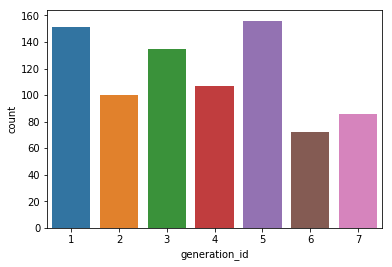

In [20]:
sb.countplot(data = pokemon, x = 'generation_id');

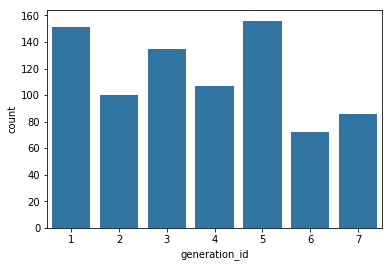

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

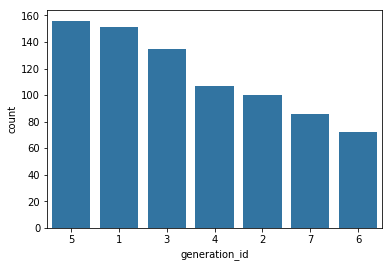

In [19]:
generation_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = generation_order);

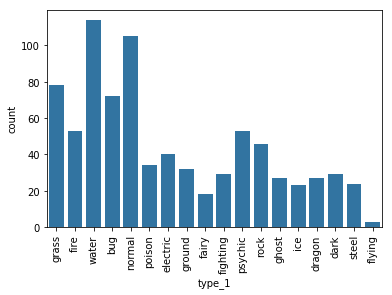

In [23]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation=90);

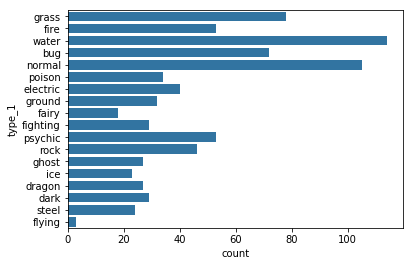

In [25]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color);

Text(0, 0.5, 'proportion')

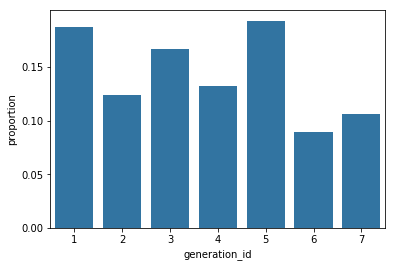

In [27]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = pokemon.shape[0]
max_count = pokemon['generation_id'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

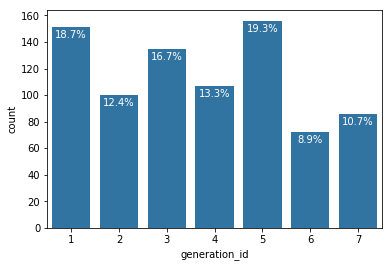

In [51]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

# add annotations
n_points = pokemon.shape[0]
gen_counts = pokemon['generation_id'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    key = label.get_text()
    count = gen_counts.get(int(key))
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

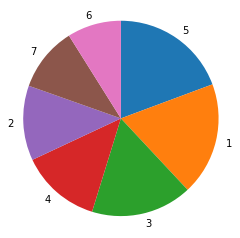

In [55]:
# code for the pie chart seen above
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

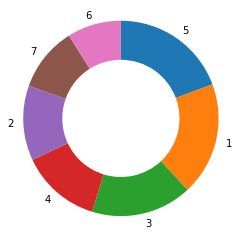

In [57]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

(array([151., 100.,   0., 135.,   0., 107., 156.,   0.,  72.,  86.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

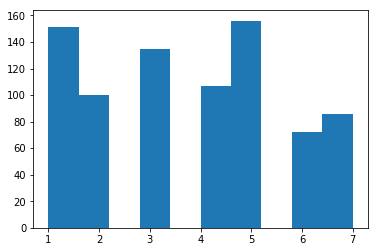

In [58]:
plt.hist(data = pokemon, x = 'generation_id')


(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

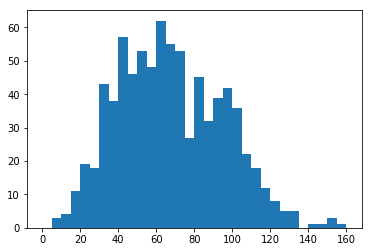

In [64]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

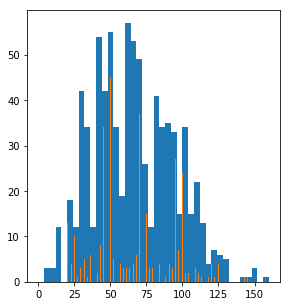

In [76]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges_new = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges_new);

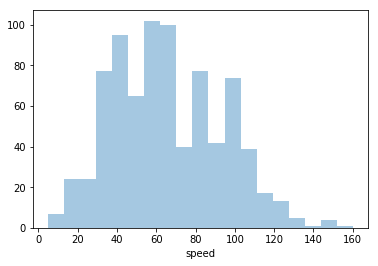

In [70]:
sb.distplot(pokemon['speed'], kde=False)
# kde = True will plot a distribution wave/plot

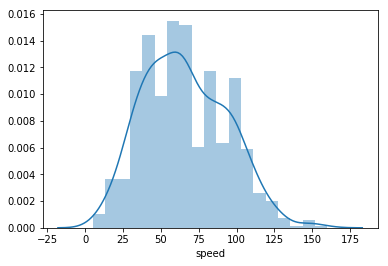

In [71]:
sb.distplot(pokemon['speed'])


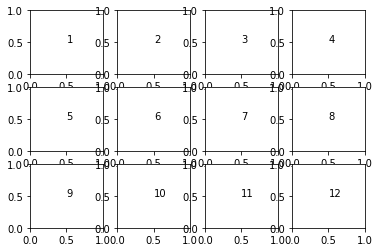

In [77]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

(array([139., 252., 206., 126.,  42.,  10.,   7.,   7.,   3.,   2.,   3.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <a list of 29 Patch objects>)

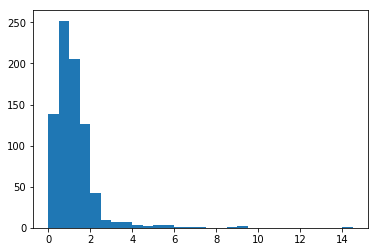

In [79]:
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)

(0, 3)

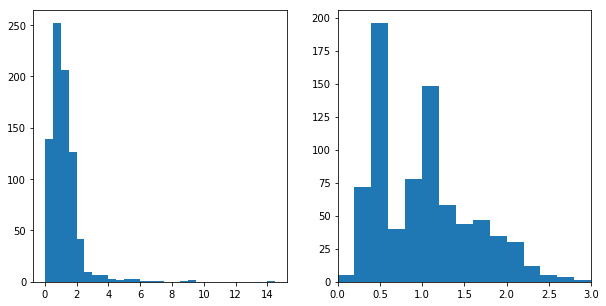

In [87]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 4
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 3+1, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.xlim(0, 3) # could also be called as plt.xlim((0, 4))

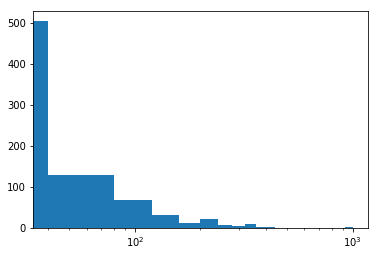

In [95]:
bin_edges = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xscale('log')


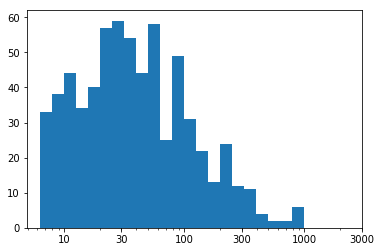

In [109]:
bin_edges = 10 ** np.arange(0.8, np.log10(pokemon['weight'].max())+ 0.1, 0.1)
plt.hist(data=pokemon, x = 'weight', bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);